In [1]:
%pylab inline
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Policies:
    close_borders = "p_close_borders"  
    hospitalization = "p_hospitalization"
    lockdown = "p_lockdown"
    quarantine = "p_quarantine"
    daily_testing = "p_daily_testing"
    contact_tracing = "p_contact_tracing"
    social_distancing = "p_social_distancing"
    exit = "p_exit"
    
    
class Capacity:
    contact_trace = "c_contact_trace"
    testing = "c_testing"
    hospital_bed = "c_hospital_bed"
    icu_beds = "c_icu_beds"
    
    
class Param:
    num_agents = "num_agents" #100;
    sim_cycle_per_day =  "sim_cycle_per_day" #500;
    agent_density = "agent_density" #0.0001;
    hospital_bed_per_agent = "hospital_bed_per_agent" #0.1;
    icu_bed_per_hospital_bed = "icu_bed_per_hospital_bed" #0.05;
    infection_percent = "infection_percent" #0.0;
    distribution_age_min = "distribution_age_min" #1;
    distribution_age_max = "distribution_age_max" #90;
    distribution_age_peak = "distribution_age_peak" #25;
    distribution_hygiene_mean = "distribution_hygiene_mean" #0.5;
    distribution_hygiene_var = "distribution_hygiene_var" #1;
    

In [3]:
def write_exp_file(d):
    name = d.get('experiment')
    with open('experiments/{}.json'.format(name), 'w') as fp:
        json.dump(d, fp)
    print("/Users/rusty/Desktop/covid-19/covid19_abm/experiments/{}.json".format(name))

In [49]:
def plot_curve(d):
    res_file = d.get('resultfile')
    df = pd.read_csv(res_file)
    stgy = d.get('strategy')
    sim_cycle = d.get(Param.sim_cycle_per_day, 500)
    print sim_cycle

    ax = plt.gca()
    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 2.7  
    
    # Modify the current size by the factor
    plt.gcf().set_size_inches(sizefactor * fig_size) 

    df.plot(kind='line',x='step',y='infected_agents',  color='red', ax=ax)
#     df.plot(kind='line',x='step',y='suscept_agents', color='blue', ax=ax)
    df.plot(kind='line',x='step',y='recovered_agents', color='green', ax=ax)
    df.plot(kind='line',x='step',y='dead_agents', color='black', ax=ax)
    plt.xlabel("days")
    plt.ylabel("count")

    # add points of interests
    for k in stgy.keys():
        i = k*sim_cycle
        text = "\n".join(["{}={}".format(k,v) for k,v in stgy.get(k).items()])
        y = df.get_value(index=i, col='infected_agents')
        plt.annotate(text, (i, y ))
        axvline(x=i, ymin=0, ymax=y, ls=":", lw=0.5)
        axhline(y=y, ls=":", lw=0.5)

    # mark x label with days
    x = np.array(stgy.keys())*sim_cycle
    my_xticks = np.array(stgy.keys())
    plt.xticks(x, my_xticks)
    
    plt.xticks(np.arange(1,105,2)*sim_cycle, range(1,105,2))
#     plt.yticks(np.arange(0,2100,100), range(0,2100,100))
    
#     plt.ylim(top=2100)
    plt.show()
    plt.subplots_adjust(left=0.16, bottom=0.19, top=0.82)

In [73]:
def plot_avg_infection(d):
    res_file = d.get('resultfile')
    df = pd.read_csv(res_file)
    stgy = d.get('strategy')
    sim_cycle = d.get(Param.sim_cycle_per_day, 500)
    print sim_cycle

    ax = plt.gca()
    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 1.7
    
    # Modify the current size by the factor
    plt.gcf().set_size_inches(sizefactor * fig_size) 

    df.plot(kind='line',x='step',y='avg_infection',  color='red', ax=ax)
# #     df.plot(kind='line',x='step',y='suscept_agents', color='blue', ax=ax)
# #     df.plot(kind='line',x='step',y='recovered_agents', color='green', ax=ax)
# #     df.plot(kind='line',x='step',y='dead_agents', color='black', ax=ax)
# #     plt.xlabel("days")
# #     plt.ylabel("count")

#     # add points of interests
#     for k in stgy.keys():
#         i = k*sim_cycle
#         text = "\n".join(["{}={}".format(k,v) for k,v in stgy.get(k).items()])
#         y = df.get_value(index=i, col='infected_agents')
#         plt.annotate(text, (i+10, y+30 ))
#         axvline(x=i, ymin=0, ymax=y, ls=":", lw=0.5)
#         axhline(y=y, ls=":", lw=0.5)

#     # mark x label with days
#     x = np.array(stgy.keys())*sim_cycle
#     my_xticks = np.array(stgy.keys())
#     plt.xticks(x, my_xticks)
    
#     plt.xticks(np.arange(1,105,2)*sim_cycle, range(1,105,2))
# #     plt.yticks(np.arange(0,2100,100), range(0,2100,100))
    
#     plt.ylim(top=2100)
    plt.xlim(xmax=2000)
    plt.show()
    plt.subplots_adjust(left=0.16, bottom=0.19, top=0.82)
    

In [70]:
plt.xlim?

In [8]:
name = "exp4"
exp4 = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    "strategy": {
        8: {
            "p_close_borders" :1,
        },
        15:{
            "p_lockdown": 1,
            "p_hospitalization":1,
        },
        22:{
            "p_quarantine":1,
            "p_daily_testing":1,
            "c_testing" : 30,
        },  
        29:{
            "p_contact_tracing":1,
            "c_contact_trace":5,
        },
        43:{
            "p_social_distancing":1,
            "p_lockdown": 0,    
        },
        50:{
            "p_lockdown": 1,
            "c_testing" : 100,
        },
        57:{
            "p_lockdown": 0,
            "c_hospital_bed": 100,
            "c_icu_beds":60
        },
        100:{
            "p_exit":1
        }
    }
}
print("/Users/rusty/Desktop/covid-19/covid19_abm/experiments/{}.json".format(exp))

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/<ufunc 'exp'>.json


500


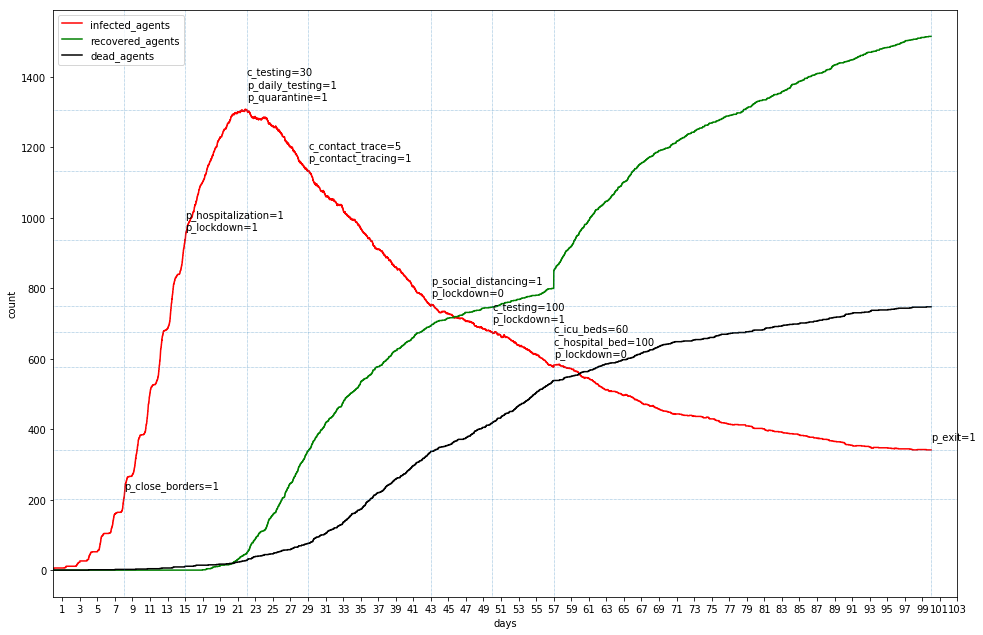

In [25]:
plot_curve(exp4)

In [4]:
name = "exp4b"
exp4b = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:100,
    "strategy": {
        8: {
            "p_close_borders" :1,
        },
        15:{
            "p_lockdown": 1,
            "p_hospitalization":1,
        },
        22:{
            "p_quarantine":1,
            "p_daily_testing":1,
            "c_testing" : 30,
        },  
        29:{
            "p_contact_tracing":1,
            "c_contact_trace":5,
        },
        43:{
            "p_social_distancing":1,
            "p_lockdown": 0,    
        },
        50:{
            "p_lockdown": 1,
            "c_testing" : 100,
        },
        57:{
            "p_lockdown": 0,
            "c_hospital_bed": 100,
            "c_icu_beds":60
        },
        100:{
            "p_exit":1
        }
    }
}

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/<ufunc 'exp'>.json


100


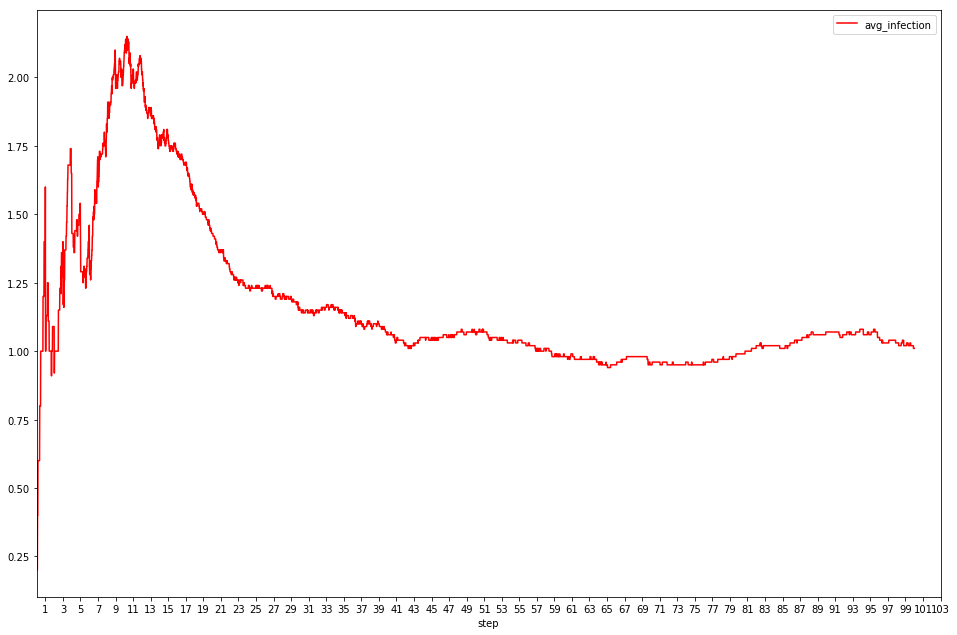

In [40]:
# plot_curve(exp4b)
plot_avg_infection(exp4b)

In [51]:
# calculation of avg is changed 
# just checking that
name = "exp4ba"
exp4ba = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:100,
    "strategy": {
        8: {
            "p_close_borders" :1,
        },
        15:{
            "p_lockdown": 1,
            "p_hospitalization":1,
        },
        22:{
            "p_quarantine":1,
            "p_daily_testing":1,
            "c_testing" : 30,
        },  
        29:{
            "p_contact_tracing":1,
            "c_contact_trace":5,
        },
        43:{
            "p_social_distancing":1,
            "p_lockdown": 0,    
        },
        50:{
            "p_lockdown": 1,
            "c_testing" : 100,
        },
        57:{
            "p_lockdown": 0,
            "c_hospital_bed": 100,
            "c_icu_beds":60
        },
        100:{
            "p_exit":1
        }
    }
}

In [52]:
write_exp_file(exp4ba)

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp4ba.json


100


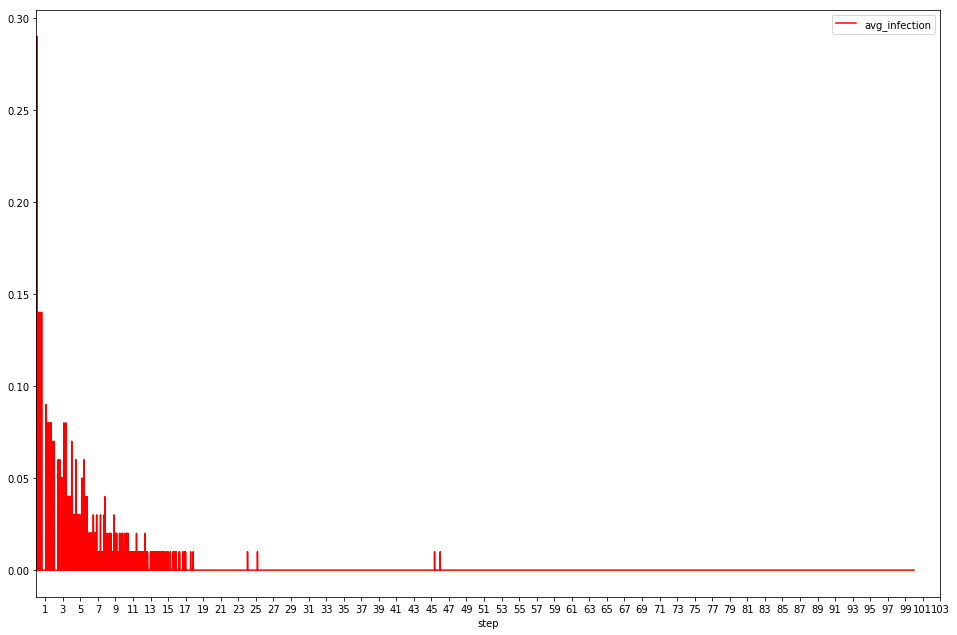

In [53]:
plot_avg_infection(exp4ba)

In [34]:
name = "exp4c"
exp4c = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    "strategy": {
        8: {
            "p_close_borders" :1,
        },
        15:{
            "p_lockdown": 1,
            "p_hospitalization":1,
        },
        22:{
            "p_quarantine":1,
            "p_daily_testing":1,
            "c_testing" : 30,
        },  
        29:{
            "p_contact_tracing":1,
            "c_contact_trace":5,
        },
        43:{
            "p_social_distancing":1,
            "p_lockdown": 0,    
        },
        50:{
            "p_lockdown": 1,
            "c_testing" : 100,
        },
        57:{
            "p_lockdown": 0,
            "c_hospital_bed": 100,
            "c_icu_beds":60
        },
        100:{
            "p_exit":1
        }
    }
}

500


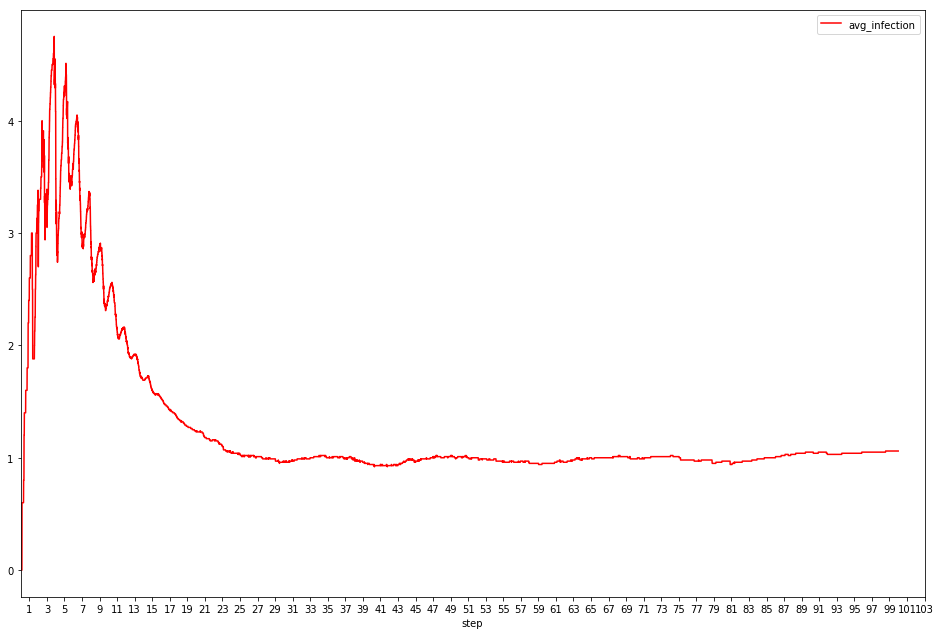

In [41]:
# plot_curve(exp4c)
plot_avg_infection(exp4c)

In [54]:
name = "exp5a"
exp5a = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:100,
    "strategy": {
        8: {
            "p_hospitalization" :1,
            Policies.close_borders:1
        },
        100:{
            Policies.exit:1
        }
    }
}

In [55]:
write_exp_file(exp5a)

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp5a.json


100


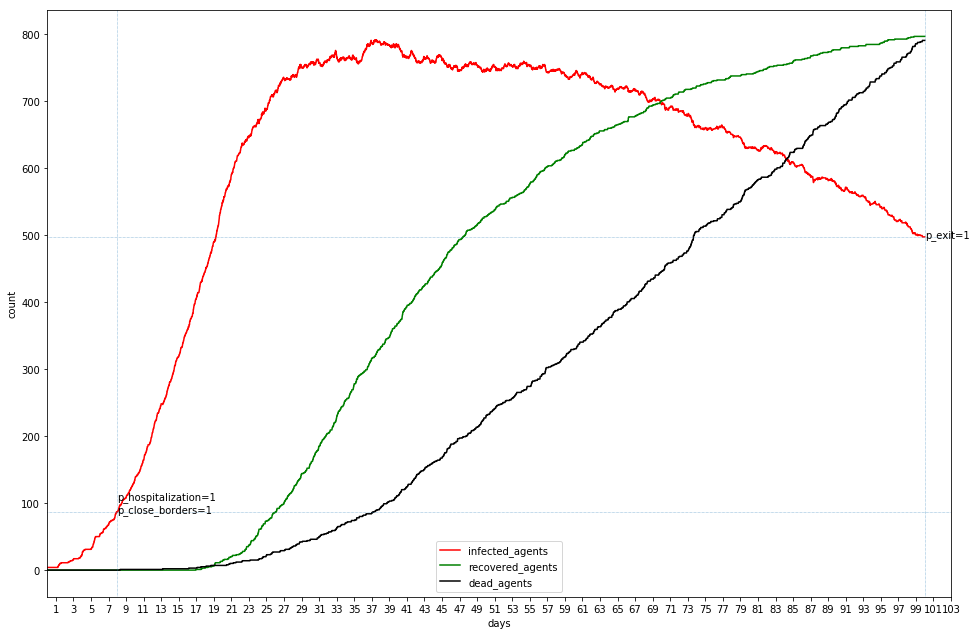

In [56]:
plot_curve(exp5a)

100


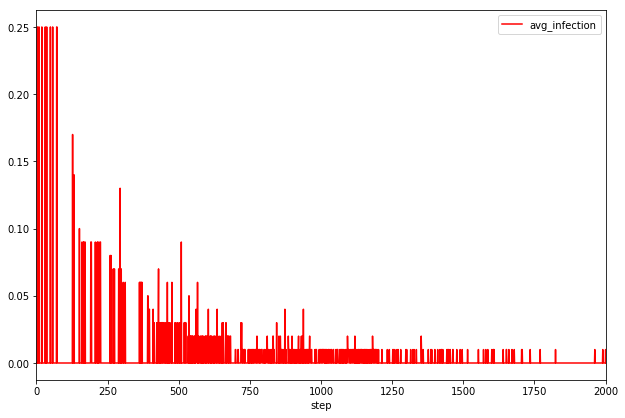

In [74]:
plot_avg_infection(exp5a)

In [75]:
res_file = exp5a.get('resultfile')
df = pd.read_csv(res_file)
df.mean(axis = 0) 

step                5000.000000
infected_agents      585.682632
exposed_agents        90.933107
recovered_agents     431.245275
dead_agents          280.515548
asympt_agents        103.873513
suscept_agents       727.991901
hospital_beds          0.935306
icu_beds               0.000000
avg_infection          0.001008
dtype: float64

In [60]:
name = "exp5b"
exp5b = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:500,
    "strategy": {
        8: {
            "p_hospitalization" :1,
            Policies.close_borders:1
        },
        100:{
            Policies.exit:1
        }
    }
}

500


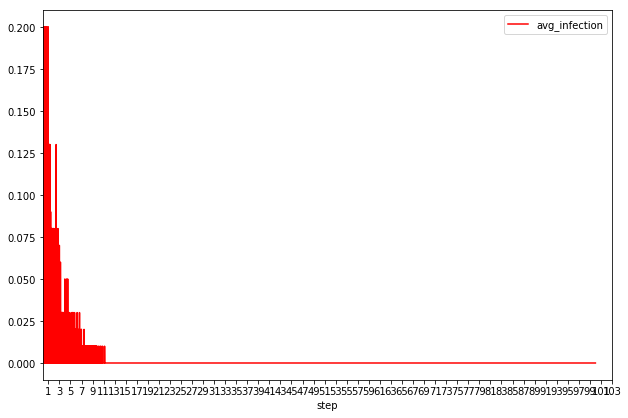

In [62]:
plot_avg_infection(exp5b)

500


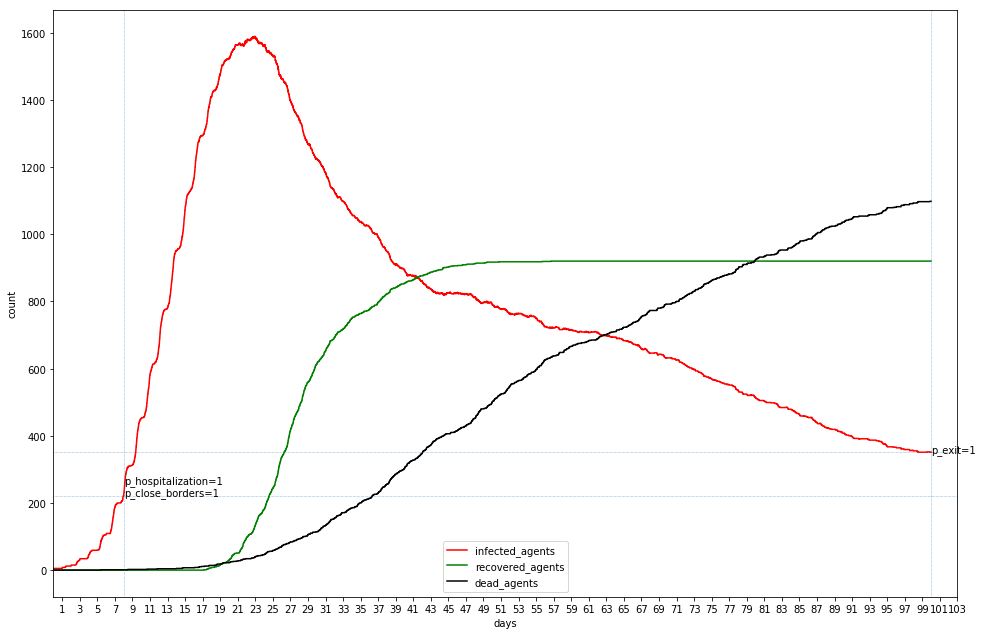

In [63]:
plot_curve(exp5b)

In [64]:
name = "exp5c"
exp5c = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:500,
    "strategy": {
        8: {
            "p_hospitalization" :1,
            Policies.close_borders:1
        },
        100:{
            Policies.exit:1
        }
    }
}


/Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp5c.json


In [82]:
# same as 5c just runnin on UI and comparing the chart
name = "exp5ca"
exp5ca = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:500,
    "strategy": {
        3: {
            Policies.close_borders:1
        },
        100:{
            Policies.exit:1
        }
    }
}

In [83]:
write_exp_file(exp5ca)

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp5ca.json


500


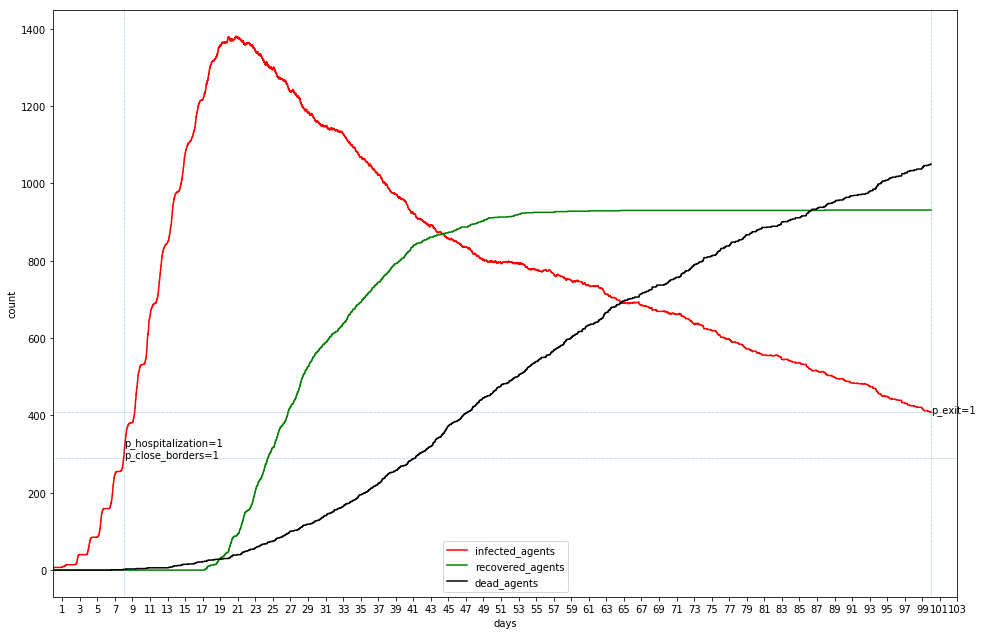

In [78]:
plot_curve(exp5c)

500


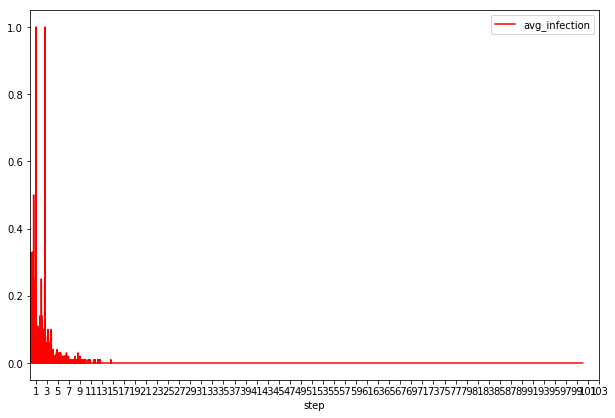

In [65]:
plot_avg_infection(exp5c)

In [76]:
name = "exp5d"
exp5d = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    Param.sim_cycle_per_day:100,
    "strategy": {
        8: {
            Policies.close_borders:1
        },
        100:{
            Policies.exit:1
        }
    }
}

In [77]:
write_exp_file(exp5d)

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp5d.json


100


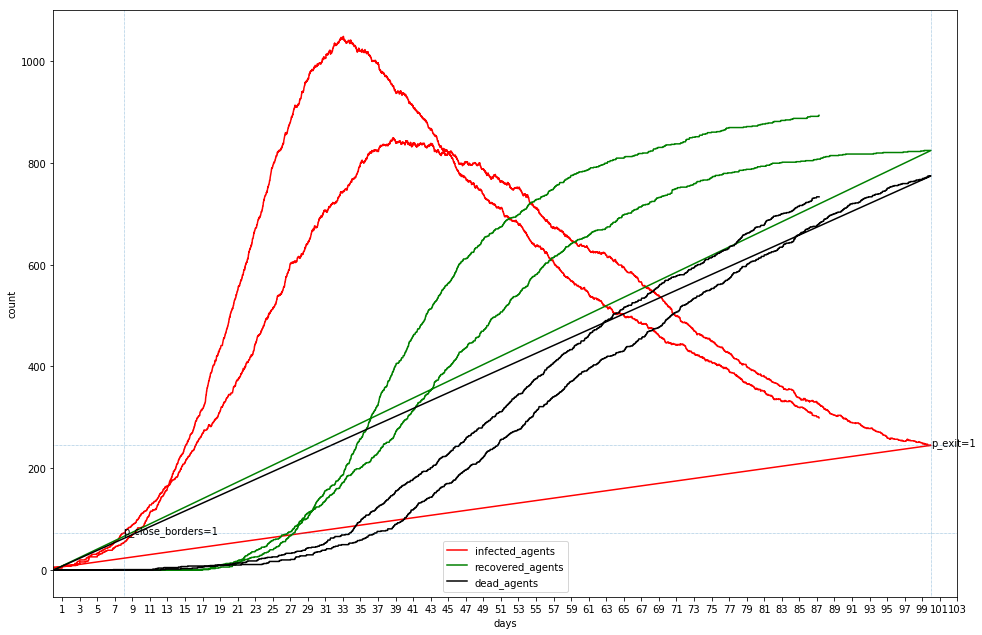

In [79]:
plot_curve(exp5d)

In [9]:
exp = "exp6"
d = {
    "experiment":exp,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(exp),
    "num_agents": 2000,
    "strategy": {
        8: {
            Policies.hospitalization :1,
            Policies.close_borders:1,
            Policies.lockdown:1
        },
        100:{
            Policies.exit:1
        }
    }
}

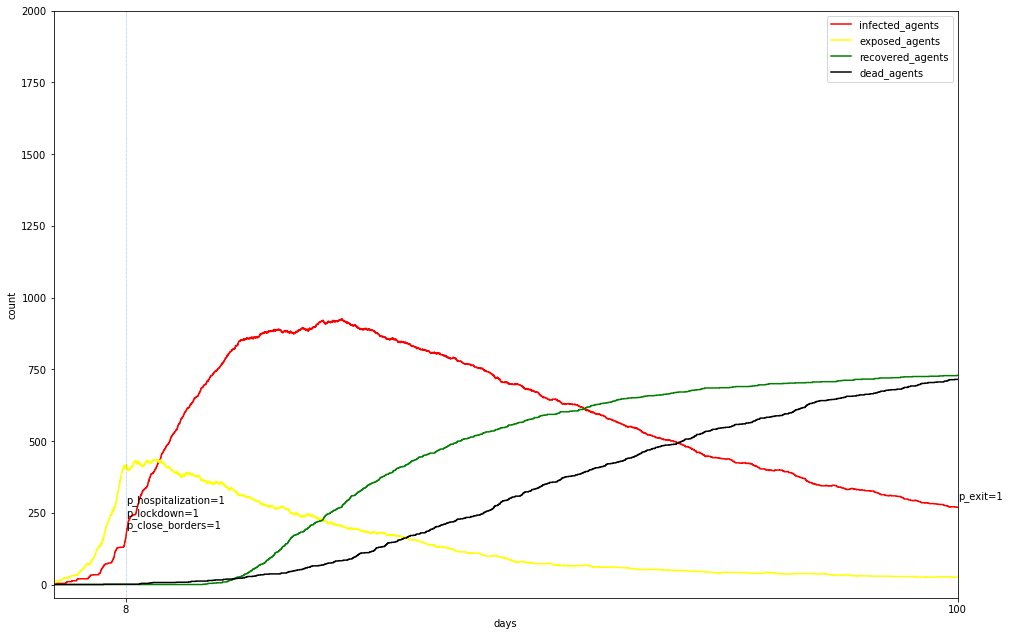

In [10]:
plot_curve(d)

In [24]:
exp = "exp7"
d = {
    "experiment":exp,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(exp),
    "num_agents": 2000,
    "strategy": {
        2: {
            Policies.hospitalization :1,
            Policies.close_borders:1,
            Policies.lockdown:1
        },
        100:{
            Policies.exit:1
        }
    }
}

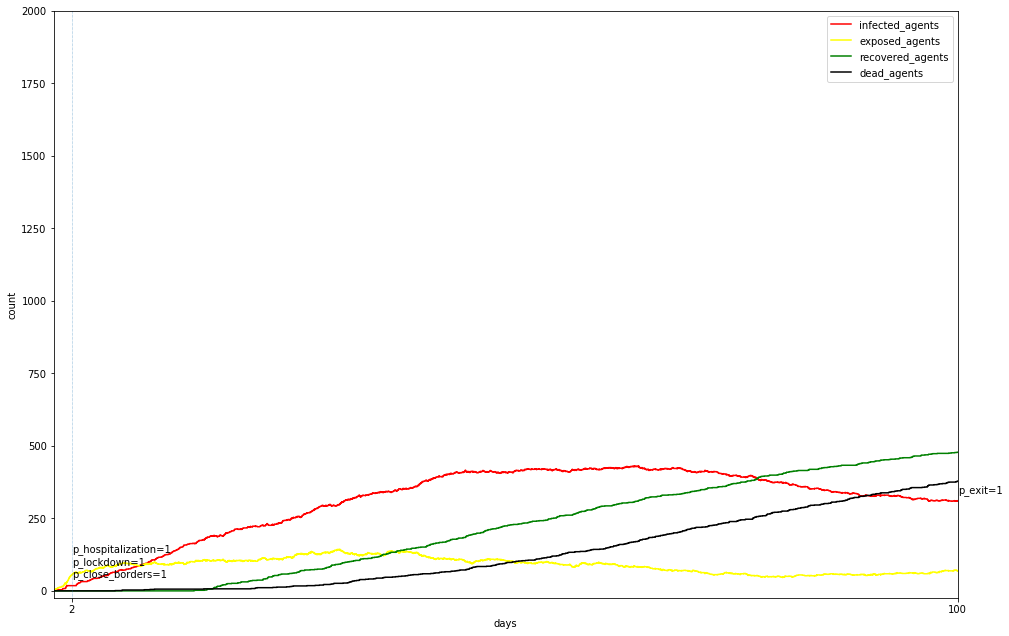

In [12]:
plot_curve(d)

In [25]:
exp = "exp8"
d = {
    "experiment":exp,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(exp),
    "num_agents": 2000,
    "strategy": {
        2: {
            Policies.hospitalization :1,
            Policies.close_borders:1,
            Policies.lockdown:1
        },
        12:{
            Policies.lockdown:0,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1
        },
        22:{
            Policies.lockdown:1
        },  
        32:{
             Policies.lockdown:0
        },
        42:{
            Policies.lockdown:1  
        },
        52:{
            Policies.lockdown:0
        },
        62:{
            Policies.lockdown:1
        },
        72:{
            Policies.lockdown:0
        },
        100:{
            "p_exit":1
        }
    }
}

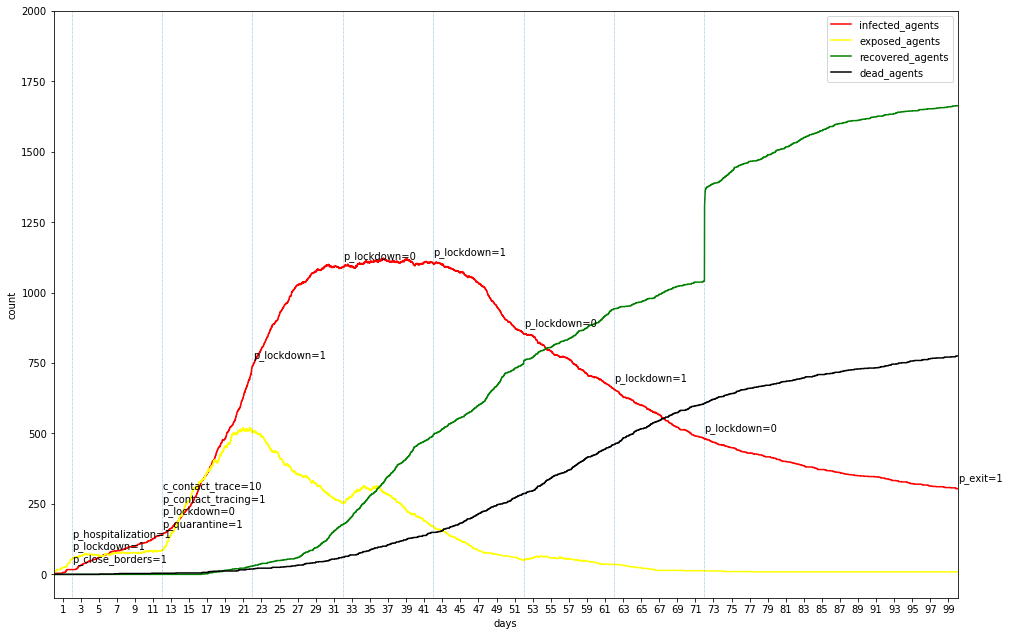

In [28]:
plot_curve(d)

In [49]:
# impose lockdown 5th day
# lockdown double the incubation period
# release it for 10 days 
# impose again for double the incubation period

name = "exp9"
exp9 = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
        5:{
            Policies.lockdown:1,
            Policies.close_borders:1,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1,
            Policies.daily_testing:1
        },
        33:{
            Policies.lockdown:0,
            Capacity.testing:20,
            Policies.social_distancing:1
        },  
        43:{
            Policies.lockdown:1,
            Capacity.testing:40,
        },
        71:{
            Policies.lockdown:0  
        },
        100:{
            Policies.exit:1
        }
    }
}

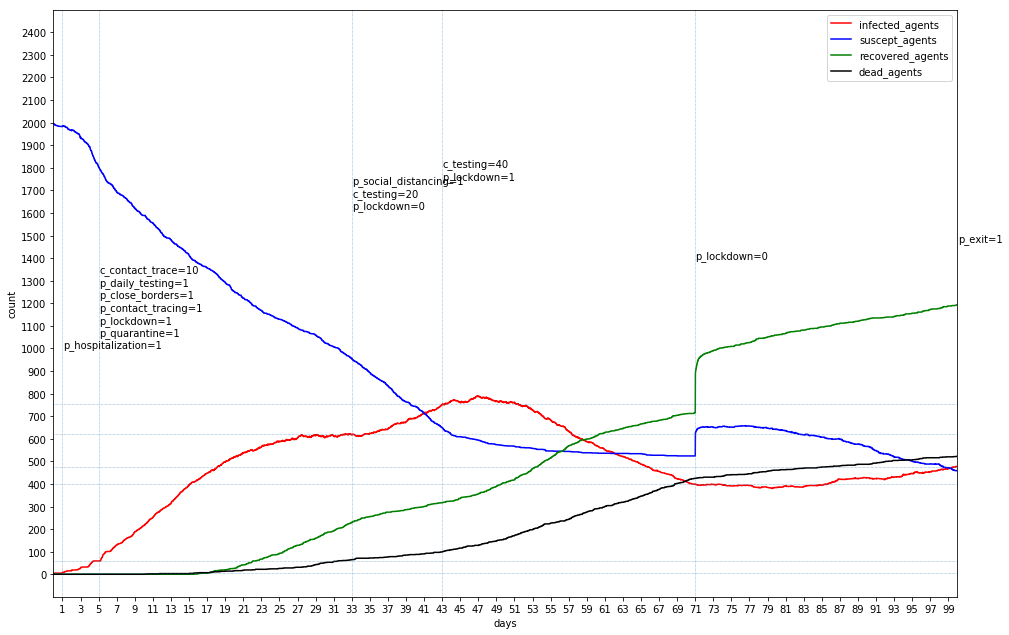

In [73]:
plot_curve(exp9)

In [55]:
# impose lockdown 5th day
# lockdown double the incubation period
# release it for 10 days 
# impose again for double the incubation period

# change sim cycle to 250 and see the difference

name = "exp9b"
exp9b = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
     Param.sim_cycle_per_day: 250,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
        5:{
            Policies.lockdown:1,
            Policies.close_borders:1,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1,
            Policies.daily_testing:1
        },
        33:{
            Policies.lockdown:0,
            Capacity.testing:20,
            Policies.social_distancing:1
        },  
        43:{
            Policies.lockdown:1,
            Capacity.testing:40,
        },
        71:{
            Policies.lockdown:0  
        },
        100:{
            Policies.exit:1
        }
    }
}

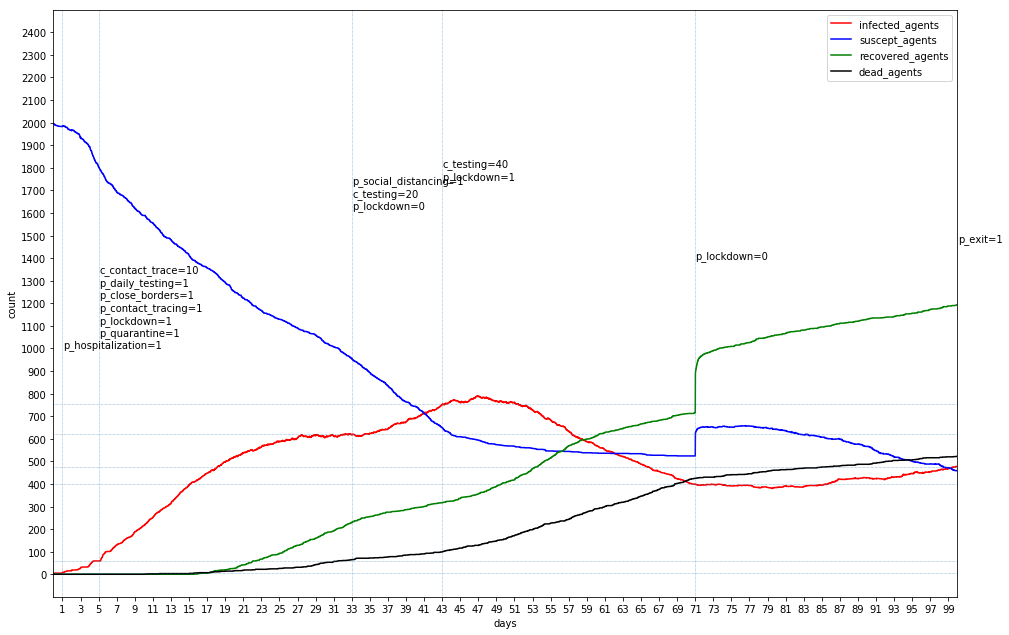

In [72]:
plot_curve(exp9b)

In [108]:
# impose lockdown 5th day
# lockdown double the incubation period
# release it for 10 days 
# impose again for double the incubation period

# change sim cycle to 150 and see the difference

name = "exp9c"
exp9c = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
     Param.sim_cycle_per_day: 150,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
        5:{
            Policies.lockdown:1,
            Policies.close_borders:1,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1,
            Policies.daily_testing:1
        },
        33:{
            Policies.lockdown:0,
            Capacity.testing:20,
            Policies.social_distancing:1
        },  
        43:{
            Policies.lockdown:1,
            Capacity.testing:40,
        },
        71:{
            Policies.lockdown:0  
        },
        100:{
            Policies.exit:1
        }
    }
}

150


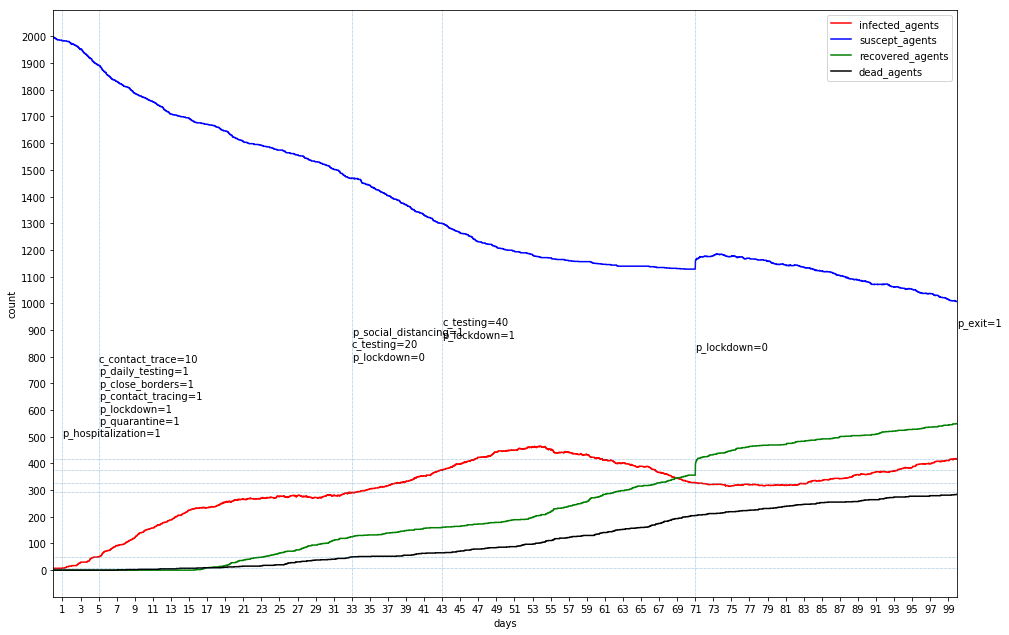

In [109]:
plot_curve(exp9c)

In [96]:
# impose lockdown 5th day
# lockdown double the incubation period
# release it for 10 days 
# impose again for double the incubation period

# change sim cycle to 100 and see the difference

name = "exp9d"
exp9d = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
     Param.sim_cycle_per_day: 100,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
        5:{
            Policies.lockdown:1,
            Policies.close_borders:1,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1,
            Policies.daily_testing:1
        },
        33:{
            Policies.lockdown:0,
            Capacity.testing:20,
            Policies.social_distancing:1
        },  
        43:{
            Policies.lockdown:1,
            Capacity.testing:40,
        },
        71:{
            Policies.lockdown:0  
        },
        100:{
            Policies.exit:1
        }
    }
}

100


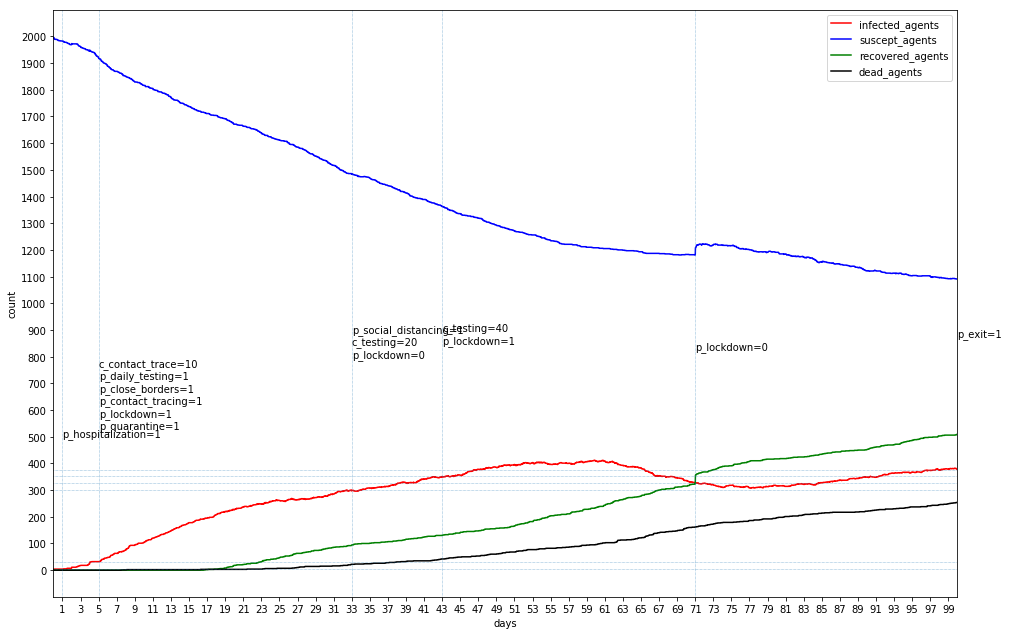

In [106]:
plot_curve(exp9d)

In [111]:
# impose lockdown 5th day
# lockdown double the incubation period
# release it for 10 days 
# impose again for double the incubation period

# change sim cycle to 100 and see the difference

name = "exp9e"
exp9e = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
     Param.sim_cycle_per_day: 50,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
        5:{
            Policies.lockdown:1,
            Policies.close_borders:1,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1,
            Policies.daily_testing:1
        },
        33:{
            Policies.lockdown:0,
            Capacity.testing:20,
            Policies.social_distancing:1
        },  
        43:{
            Policies.lockdown:1,
            Capacity.testing:40,
        },
        71:{
            Policies.lockdown:0  
        },
        100:{
            Policies.exit:1
        }
    }
}

50


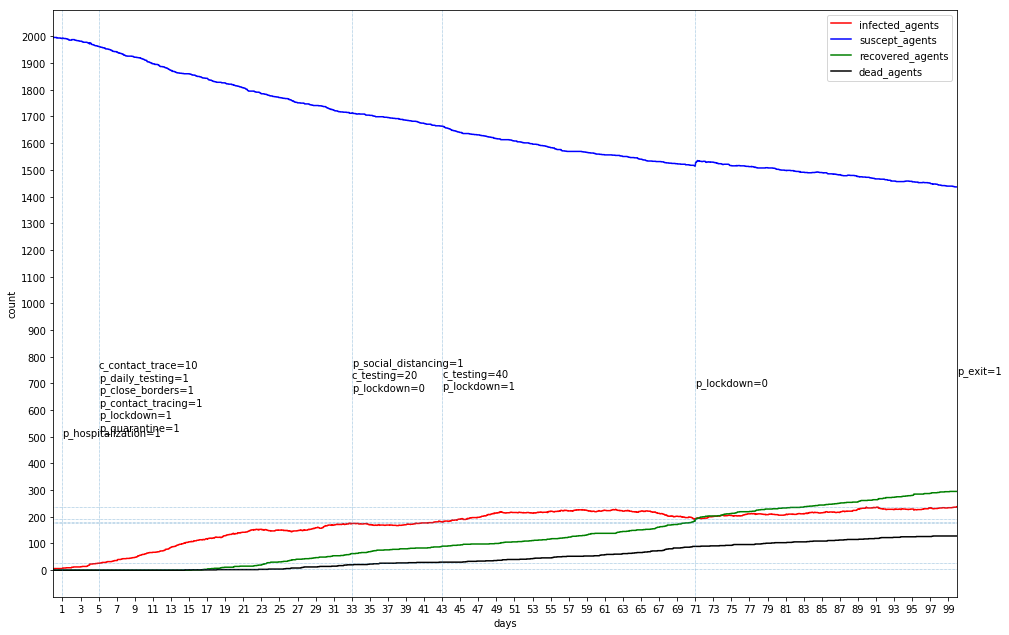

In [113]:
plot_curve(exp9e)

In [115]:
# free roam with 50 sim cycle per day
name = "exp11"
exp11 = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
     Param.sim_cycle_per_day: 50,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
    }
}

50


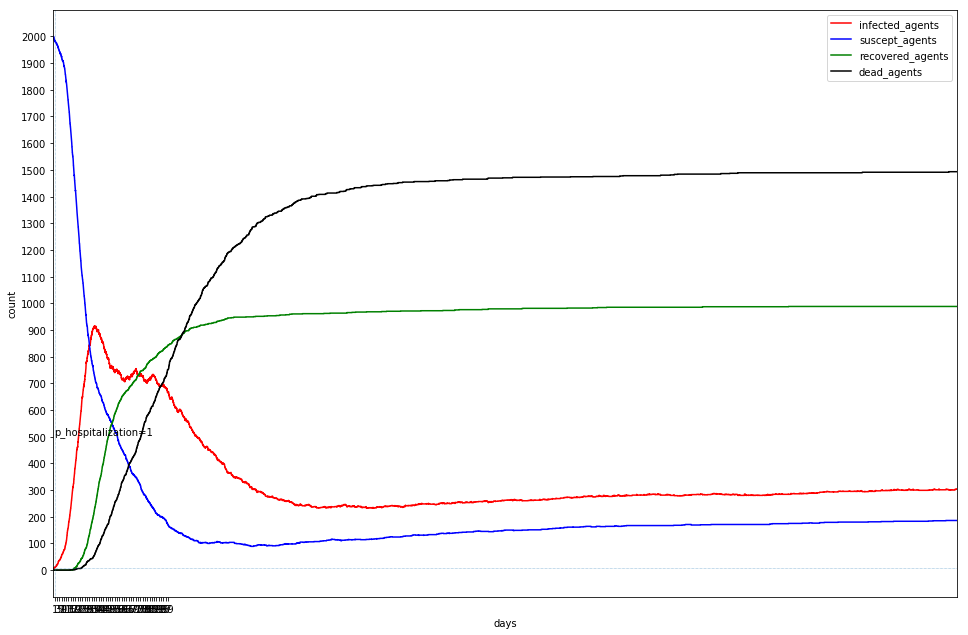

In [117]:
plot_curve(exp11)

In [43]:
# impose lockdown 5th day
# lockdown double the incubation period
# release it for 10 days 
# impose again for double the incubation period

name = "exp10"
exp10 = {
    "experiment":name,
    "resultfile": "/Users/rusty/Desktop/covid-19/covid19_abm/results/{}.csv".format(name),
    "num_agents": 2000,
    "strategy": {
        1: {
            Policies.hospitalization :1,
        },
        5:{
            Policies.lockdown:1,
            Policies.close_borders:1,
            Policies.contact_tracing:1,
            Capacity.contact_trace:10,
            Policies.quarantine:1,
            Policies.daily_testing:1,
            Capacity.hospital_bed : 100
        },
        10:{
            Capacity.icu_beds : 40
        },
        33:{
            Policies.lockdown:0,
            Capacity.testing:20,
            Policies.social_distancing:1
        },  
        43:{
            Policies.lockdown:1,
            Capacity.testing:40,
        },
        71:{
             Policies.lockdown:0
        },
        100:{
            Policies.exit:1
        }
    }
}

In [100]:
write_exp_file(exp10)

/Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp10.json


500


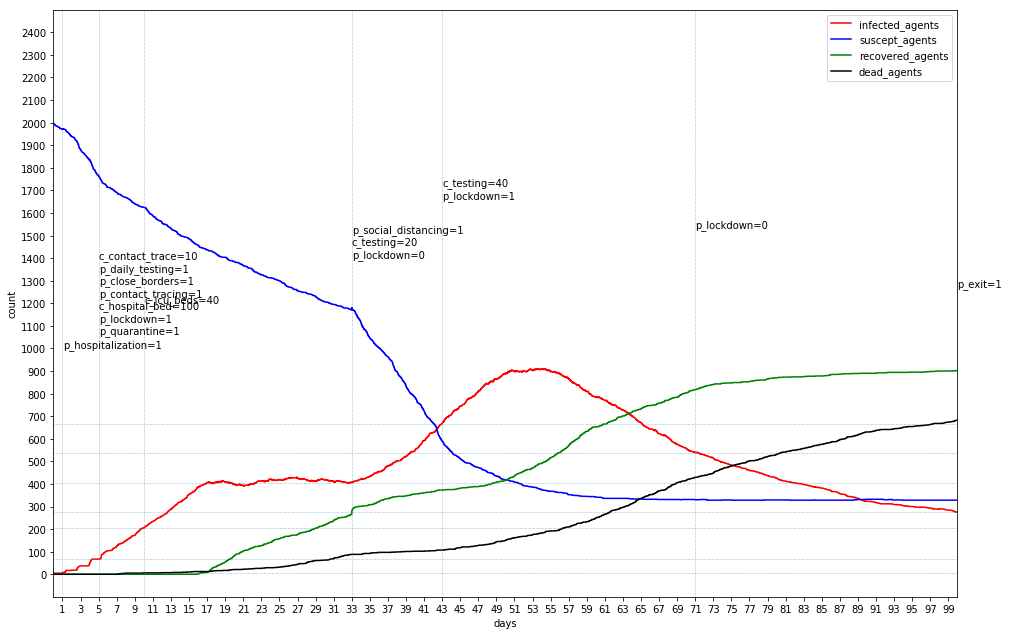

In [101]:
plot_curve(exp10)

In [ ]:
# get how many agent are infected from an infectious agent per day?
# this.c_inf ++
# sum(this.c_inf)/total agents per day!

In [118]:
def plot_curve(d):
    res_file = d.get('resultfile')
    df = pd.read_csv(res_file)
    stgy = d.get('strategy')
    sim_cycle = d.get(Param.sim_cycle_per_day, 500)
    print sim_cycle

    ax = plt.gca()
    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 2.7  
    
    # Modify the current size by the factor
    plt.gcf().set_size_inches(sizefactor * fig_size) 

    df.plot(kind='line',x='step',y='infected_agents',  color='red', ax=ax)
    df.plot(kind='line',x='step',y='suscept_agents', color='blue', ax=ax)
    df.plot(kind='line',x='step',y='recovered_agents', color='green', ax=ax)
    df.plot(kind='line',x='step',y='dead_agents', color='black', ax=ax)
    plt.xlabel("days")
    plt.ylabel("count")

    # add points of interests
    for k in stgy.keys():
        i = k*sim_cycle
        text = "\n".join(["{}={}".format(k,v) for k,v in stgy.get(k).items()])
        y = df.get_value(index=i, col='infected_agents')
        plt.annotate(text, (i, y+500 ))
        axvline(x=i, ymin=0, ymax=y, ls=":", lw=0.5)
        axhline(y=y, ls=":", lw=0.5)

    # mark x label with days
    x = np.array(stgy.keys())*sim_cycle
    my_xticks = np.array(stgy.keys())
    plt.xticks(x, my_xticks)
    
    plt.xticks(np.arange(1,105,2)*sim_cycle, range(1,105,2))
    plt.yticks(np.arange(0,2100,100), range(0,2100,100))
    
    plt.ylim(top=2100)
    plt.show()
    plt.subplots_adjust(left=0.16, bottom=0.19, top=0.82)

In [85]:
import os
os.chdir('src/')

In [87]:
# !cd src
!java abmforcovid/RunABM /Users/rusty/Desktop/covid-19/covid19_abm/experiments/exp5.json

Setting parameters for experiment exp5
MASON Version 20.  For further options, try adding ' -help' at end.
Job: 0 Seed: 1751184271
R0 for today is --------------------------------> 0.0
Job 0: Steps: 250 Time: 249 Rate: 150.15015
Job 0: Steps: 500 Time: 499 Rate: 152.62515
R0 for today is --------------------------------> 5.6
Job 0: Steps: 750 Time: 749 Rate: 188.96447
Job 0: Steps: 1000 Time: 999 Rate: 195.92476
R0 for today is --------------------------------> 5.076923076923077
Job 0: Steps: 1250 Time: 1249 Rate: 176.05634
Job 0: Steps: 1500 Time: 1499 Rate: 178.8269
R0 for today is --------------------------------> 3.054054054054054
Job 0: Steps: 1750 Time: 1749 Rate: 198.4127
Job 0: Steps: 2000 Time: 1999 Rate: 146.28438
R0 for today is --------------------------------> 3.3333333333333335
Job 0: Steps: 2250 Time: 2249 Rate: 197.3165
Job 0: Steps: 2500 Time: 2499 Rate: 200.80321
R0 for today is --------------------------------> 3.4489795918367347
Job 0: Steps: 2750 Time: 2749 Rate: 1